In [250]:
html_doc = """
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
"""

from bs4 import BeautifulSoup as bs

soup = bs(html_doc, 'html.parser')
soup


<html lang="en">
<head><title>crawl</title></head>
<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div><img height="200" src="/source" width="300"/></div>
</body>
</html>

In [251]:
print(soup.prettify()) # 프린트하면 칸까지 맞춰서 출력

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [252]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
soup = bs(html, 'html.parser')
h1 = soup.html.body.h1   # 바디
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling # 공백이 하나 있어서 next~2번써줌

print(h1.string)  # 문자열로 출력
print(p1.string)
print(p2.string)

스크레이핑이란?
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [253]:
from bs4 import BeautifulSoup
html = """
<html><body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
# 위 html데이터에 id 부여함
soup = BeautifulSoup(html, 'html.parser') # bS(객체, 'html.parser'). html.parser : 객체에게 HTML을 분석해라
title = soup.find(id='title')
body = soup.find(id='body')

print(title.string)
print(body.string)
print(title.text)
print(body.text)
print(body.get_text())

스크레이핑이란?
웹 페이지를 분석하는 것
스크레이핑이란?
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [254]:
texts = soup.findAll('p')
# texts = soup.find_all('p')
for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


- urlopen()과 BeautifulSoup의 조합

In [255]:
from bs4 import BeautifulSoup as bs
import urllib.request as req
import warnings
warnings.filterwarnings('ignore')
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"  # 기상청
res = req.urlopen(url)
soup = bs(res, 'html.parser')
title = soup.find('title').string   #스트링으로 바꾸기
wf = soup.find('wf').string  #wf : 일기예보
print(title,'\n')
print(wf)

기상청 육상 중기예보 

○ (강수) 31일(일)~8월 1일(월) 전라권과 제주도에, 8월 2일(화) 제주도에 비가 오겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 24~26도, 낮 기온은 29~35도로 오늘(27일, 아침최저기온 21~26도, 낮최고기온 28~33도)보다 조금 높겠습니다.<br />○ (해상) 31일(일)~8월 1일(월)은 서해남부해상과 제주도해상을 중심으로 물결이 2.0~5.0m로 매우 높게 일겠습니다.<br />○ (주말전망) 30일(토)은 가끔 구름많고 전라권에는 오후에 소나기가, 밤에 제주도는 비가, 31일(일)은 가끔 구름많겠으나, 전라권과 제주도에는 흐리고 비가 오겠습니다.<br />              아침 기온은 23~26도, 낮 기온은 28~34도가 되겠습니다.<br /><br />* 이번 예보기간에는 북태평양고기압의 확장 정도와 제5호 태풍 송다(SONGDA)로 발달될 것으로 예상되는 열대저압부의 이동경로에 따라 강수의 변동성이 크겠으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [256]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"  # 기상청
data = requests.get(url).text
soup = bs(data, 'html.parser')
wf = soup.find('wf').string
wf = re.sub('[^0-9가-힣]', ' ', wf) # 숫자 한글이 아닌건 스페이스로 바꿔줌 wf에서
wf

'   강수  31일 일  8월 1일 월  전라권과 제주도에  8월 2일 화  제주도에 비가 오겠습니다           기온  이번 예보기간 아침 기온은 24 26도  낮 기온은 29 35도로 오늘 27일  아침최저기온 21 26도  낮최고기온 28 33도 보다 조금 높겠습니다          해상  31일 일  8월 1일 월 은 서해남부해상과 제주도해상을 중심으로 물결이 2 0 5 0 로 매우 높게 일겠습니다          주말전망  30일 토 은 가끔 구름많고 전라권에는 오후에 소나기가  밤에 제주도는 비가  31일 일 은 가끔 구름많겠으나  전라권과 제주도에는 흐리고 비가 오겠습니다                     아침 기온은 23 26도  낮 기온은 28 34도가 되겠습니다               이번 예보기간에는 북태평양고기압의 확장 정도와 제5호 태풍 송다        로 발달될 것으로 예상되는 열대저압부의 이동경로에 따라 강수의 변동성이 크겠으니  앞으로 발표되는 기상정보를 참고하기 바랍니다 '

- 과제 07/22 (2)

wf를 다시 정렬하여 불필요한 부분을 제거하세요. 

In [257]:
# '(강수) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다. 27일(수)은 수도권과 강원영서에 비가 오겠습니다.(기온) 이번 예보기간 아침 기온은 22~26도로 어제(19일, 아침최저기온 20~24도)보다 조금 높겠고, 낮 기온은 28~34도로 어제(낮최고기온 27~34도)와 비슷하겠습니다.(주말전망) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다.
wf1 = wf.replace('           ', ' ')
wf2 = wf1.replace('  ', ' ')
wf2.replace('  ', ' ').replace('  ', ' ')

' 강수 31일 일 8월 1일 월 전라권과 제주도에 8월 2일 화 제주도에 비가 오겠습니다 기온 이번 예보기간 아침 기온은 24 26도 낮 기온은 29 35도로 오늘 27일 아침최저기온 21 26도 낮최고기온 28 33도 보다 조금 높겠습니다  해상 31일 일 8월 1일 월 은 서해남부해상과 제주도해상을 중심으로 물결이 2 0 5 0 로 매우 높게 일겠습니다  주말전망 30일 토 은 가끔 구름많고 전라권에는 오후에 소나기가 밤에 제주도는 비가 31일 일 은 가끔 구름많겠으나 전라권과 제주도에는 흐리고 비가 오겠습니다  아침 기온은 23 26도 낮 기온은 28 34도가 되겠습니다 이번 예보기간에는 북태평양고기압의 확장 정도와 제5호 태풍 송다 로 발달될 것으로 예상되는 열대저압부의 이동경로에 따라 강수의 변동성이 크겠으니 앞으로 발표되는 기상정보를 참고하기 바랍니다 '

In [258]:
# 위방식대로 해도되지만.. 저렇게 줄여나가는 것은 비효율적
# re.split(정규식패턴, 적용할 텍스트)
import re
words = " ".join(re.split(r'\s+', wf))
words

' 강수 31일 일 8월 1일 월 전라권과 제주도에 8월 2일 화 제주도에 비가 오겠습니다 기온 이번 예보기간 아침 기온은 24 26도 낮 기온은 29 35도로 오늘 27일 아침최저기온 21 26도 낮최고기온 28 33도 보다 조금 높겠습니다 해상 31일 일 8월 1일 월 은 서해남부해상과 제주도해상을 중심으로 물결이 2 0 5 0 로 매우 높게 일겠습니다 주말전망 30일 토 은 가끔 구름많고 전라권에는 오후에 소나기가 밤에 제주도는 비가 31일 일 은 가끔 구름많겠으나 전라권과 제주도에는 흐리고 비가 오겠습니다 아침 기온은 23 26도 낮 기온은 28 34도가 되겠습니다 이번 예보기간에는 북태평양고기압의 확장 정도와 제5호 태풍 송다 로 발달될 것으로 예상되는 열대저압부의 이동경로에 따라 강수의 변동성이 크겠으니 앞으로 발표되는 기상정보를 참고하기 바랍니다 '

In [259]:
texts = soup.find_all('wf')
for t in texts :
    t = t.text
    t = re.sub('[^0-9가-힣]',' ', t)
    print(t, '\n')

   강수  31일 일  8월 1일 월  전라권과 제주도에  8월 2일 화  제주도에 비가 오겠습니다           기온  이번 예보기간 아침 기온은 24 26도  낮 기온은 29 35도로 오늘 27일  아침최저기온 21 26도  낮최고기온 28 33도 보다 조금 높겠습니다          해상  31일 일  8월 1일 월 은 서해남부해상과 제주도해상을 중심으로 물결이 2 0 5 0 로 매우 높게 일겠습니다          주말전망  30일 토 은 가끔 구름많고 전라권에는 오후에 소나기가  밤에 제주도는 비가  31일 일 은 가끔 구름많겠으나  전라권과 제주도에는 흐리고 비가 오겠습니다                     아침 기온은 23 26도  낮 기온은 28 34도가 되겠습니다               이번 예보기간에는 북태평양고기압의 확장 정도와 제5호 태풍 송다        로 발달될 것으로 예상되는 열대저압부의 이동경로에 따라 강수의 변동성이 크겠으니  앞으로 발표되는 기상정보를 참고하기 바랍니다  

맑음 

흐리고 비 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

맑음 

흐리고 비 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

맑음 

흐리고 비 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

맑음 

흐리고 비 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

맑음 

흐리고 비 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

맑음 

흐리고 비 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

맑음 

흐리고 비 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

흐림 

맑음 


In [260]:
req = requests.get('https://naver.com')
html = req.text
# print(html)

soup = bs(html, 'html.parser') # bs는 태그를 이용해서 추출가능
# result = soup.find_all('span', class_='blind')[0]
# result = soup.find_all('span', class_='fix')
result = soup.find_all('span', attrs={'class':"fix"}) # attr: 속성, <span class="fix"> 찾기
result

[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [261]:
import re

req = requests.get('https://www.naver.com')
soup = bs(html, 'html.parser')
print(soup.find_all(string="네이버"))
print(soup.find_all(string=re.compile("네이버")))

['네이버']
['네이버', '네이버를 시작페이지로', '쥬니어네이버', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', '초당옥수수 먹는법 요리 초당옥수수 라떼 간단한 간식 만들기 안녕하세요, 세라입니다. 옥수수 알갱이가 팡팡 터지면서 신선한 과즙이 입 안을 가득 채우는 초당옥수수! 과일처럼 생과로 먹는 것을 추천하지만 저는 살짝 익혀서 먹는 걸 더 좋아합니다. 이웃님들 #초당옥수수먹는법 잘 알고 계세요? 이렇게 드셔보세요~ 네이버TV(NOW) 영상 즐겁게 감상하시고 공감 좋', '안녕하세요, 네이버 레시피입니다. 매주 장바구니 소개 코너로 이웃님들과 함께 해왔는데요:) 7월 한 달간 #네이버장보기 #장보기만렙 챌린지로 찾아 뵙게 됐습니다. 총 4주간 매주 월요일마다 다른 주제와 7월의 더위보다 HOT한 혜택으로 찾아올테니 많은 참여와 장보기 후기 부탁드립니다💚 1) 많은 분들이 질문주신 후기 사진 4장, 글 10줄 조건은 2주차 ', '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


- select_one(), select()
 - CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
 - class는 . , id는 #로 표시

In [262]:
from bs4 import BeautifulSoup as bs
import urllib.request as req

url = "https://finance.naver.com/marketindex/"

res = req.urlopen(url)  
soup = bs(res, 'html.parser') 
price = soup.select_one('div.head_info > span.value').string
# usd = soup.selcet_one('#exchangeList > li.on > a.head.usd > div > span.value').string
print('usd/krw =', price)
# print('usd/krw =', usd)

usd/krw = 1,313.00


In [263]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [264]:
!pip install lxml

In [265]:
from bs4 import BeautifulSoup as bsoup

bs = bsoup(html_doc, 'html.parser')
print(bs.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <div>
  </div>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [266]:
bs.title

<title>The Dormouse's story</title>

In [267]:
bs.title.name

'title'

In [268]:
bs.title.parent.name

'head'

In [269]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [270]:
bs.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [271]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [272]:
bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [273]:
bs.a['class']

['sister']

In [274]:
for link in bs.find_all('a') :
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [275]:
bs.find_all()

[<html><head><title>The Dormouse's story</title></head>
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body></html>,
 <head><title>The Dormouse's story</title></head>,
 <title>The Dormouse's story</title>,
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;

In [276]:
bs.find_all('p') # a태그는 p 안에 있어서 다나온것

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용


In [277]:
print(bs.string)

None


In [278]:
print(bs.get_text())

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [279]:
print(bs.find('div'))

<div></div>


In [280]:
print(bs.find('div').string)

None


In [281]:
print(bs.find('div').get_text()) # str의 경우 문자열이없으면 아무정보도 출력되지않음

In [282]:
print(bs.find('body').string)

None


In [283]:
bs.find('body').get_text()

"\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n"

In [284]:
bs.a.string # str은 해당되는것만

'Elsie'

In [285]:
li = bs.find_all('p')
li

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [286]:
for i in li :
    print(i.string)  # 두번째는 none

The Dormouse's story
None
...


In [287]:
for i in li :
    print(i.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


- urllib + bs

In [288]:
import urllib.request as rq
from bs4 import BeautifulSoup as bsoup
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = bsoup(html, 'lxml')
text = bs.find('p')
text = text.get_text()
text

ConnectionResetError: [WinError 10054] 현재 연결은 원격 호스트에 의해 강제로 끊겼습니다

In [ ]:
bs.find('div').find('a').string

In [ ]:
items = bs.find('div').find_all('a') # find_all 쓰면 get_text 사용할수없음
for item in items :                  # items.get_text 안된다는뜻
    a =print(item.get_text())
a

- 과제 07/25 (1) 상기 출력물을 불필요한 공백없이 정렬하여 출력하세요.

In [ ]:
import re
import urllib.request as rq
from bs4 import BeautifulSoup as bsoup

url : 'https://news.naver.com/'
html = rq.urlopen(url)
soup = bsoup(html, 'lxml')

items = soup.find('div').find_all('a')

li=[]
for i in items :
    li.append(i.get_text())
    
    
a = ' '.join(li)
a
a = re.sub('\W',' ',a)
a = re.sub('\s{2,}',' ',a)
a
# b = a.tolist()

# title_list = target.tolist() # 리스트로 변환
# text = ' '.join(title_list) 
# text


# " ".join(a)
# print(a.get_text)
# b = " ".join(a)
# # re.split(정규식패턴, 적용할 텍스트)
# import re
# words = " ".join(re.split(r'\s+', wf))
# words

In [ ]:
items = bs.find('div', id='header').find_all('a') # div태그에서 id가 header인것 에서 a찾기
for item in items :
    print(item.get_text()) # 태그 이하 텍스트 추출

In [ ]:
texts = bs.find_all('p') # p태그 
texts
for t in texts :
#     print(t.string)
    print(t.get_text())

In [ ]:
import urllib.request as rq
import re
from bs4 import BeautifulSoup as bsoup
url = 'http://news.naver.com'
html = rq.urlopen(url)
bs = bsoup(html,'lxml')
bs = bs.text   # bs = str(bs) < 다뽑아줌, bs = bs.get_text() <태그사이에있는 문자만 뽑아줌
p = re.sub('[^가-힣]', ' ', bs)
p = " ".join(re.split(r'\s+', p))
# p = re.sub('\s{2,}', ' ', p)
p

# result = re.findall('[가-힣]+',text)
# result = ' '.join(result)
# result

In [ ]:
url = 'http://news.naver.com'
html = rq.urlopen(url)
bs = bsoup(html,'lxml')
texts = bs.find_all('p')
for t in texts :
    #print(t.string, '\n')    << str로 해서 데이터에 none 값 있음.
    print(t.get_text(),'\n')

- requests + bs

In [ ]:
from bs4 import BeautifulSoup as bsoup
import requests as rq

url = 'https://news.naver.com'
r = rq.get(url)
html = r.text
bs = bsoup(html, 'lxml')
text = bs.find('p').get_text()
text

- 과제 07/25 (2)

 기상청 육상 정보에서 강원도의 지역번호는 105이다. 강원도의 날씨 예보를 불필요한 공백을 제거 후 출력하세요.

In [ ]:
# 지역번호 105 강릉?
import urllib.request as rq
import re
from bs4 import BeautifulSoup as bsoup
url = "https://www.weather.go.kr/plus/land/forecast/summary.jsp?stnId=105"
html = rq.urlopen(url)
bs = bsoup(html,'lxml')
bs = bs.text   # bs = str(bs) < 다뽑아줌, bs = bs.get_text() <태그사이에있는 문자만 뽑아줌
p = " ".join(re.split(r'\s+', bs))
# p = re.sub('\s{2,}', ' ', p)
p

In [ ]:
import requests as rq
import re
import warnings
warnings.filterwarnings('ignore')

url = 'https://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=105'


html = rq.get(url).text
soup = bsoup(html,'html.parser')
wf = soup.find('wf').get_text()
wf
wf = re.sub('[^가-힣0-9()~.,m ]',' ',wf)
re.sub('\s{2,}','',wf)

- 과제 07/25 (3)

"http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.

In [ ]:
from bs4 import BeautifulSoup as bsoup
import re
import requests
url = 'https://www.naver.com'
req = requests.get(url)
html = req.text # url 텍스트로

soup = bsoup(html, 'html.parser') # bs는 태그를 이용해서 추출가능

result = soup.find_all('span') # <span~ 찾기
result

p = re.findall('[가-힣]+', str(result)) # 문자화시켜서 정제
# result = p.find_all
# print(p)

q = re.sub('[^가-힣]', ' ', str(p))  # 다시 문자화시켜서 re.sub
words = " ".join(re.split('\s+', q))
words

In [ ]:

# result = soup.find_all('span', class_='blind')[0]
# result = soup.find_all('span', class_='fix')


- 과제 07/25 (4)

"http://www.naver.com" 사이트에서 span 태그에 연결된 문자+숫자를 불필요한 공백을 제거 후 출력하세요.

In [ ]:
# https://goodthings4me.tistory.com/191 참고
from bs4 import BeautifulSoup as bsoup
import re
import requests
url = 'https://www.naver.com'
req = requests.get(url)
html = req.text

soup = bsoup(html, 'html.parser')
result = soup.find_all('span') # <span~ 찾기
result
# p = re.findall('[<]span\sclass[=]["]\w+[">]', str(result))  # <span class="이부분 추출">


li=[]
for i in result :
    li.append(i.get_text())  # a[0:12] : <span class="   a[-1] : "

li = " ".join(li)


In [ ]:

# q = re.sub('[^가-힣]', ' ', str(p))  # p 다시 문자화시켜서 re.sub
# words = " ".join(re.split(r'\s+', q)) # 공백제거
# words

- 과제 07/25 (5)

"http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 한줄에 출력하세요.

In [ ]:
# <a id="">
from bs4 import BeautifulSoup as bsoup
import re
import requests

url = 'https://www.naver.com'
req = requests.get(url)
html = req.text

soup = bsoup(html, 'html.parser')
result = soup.find_all('a') # a태그 찾기  attrs={'class':"fix"}?
# result = soup.find('a') ?
# soup.find(id='~') 
result

In [ ]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://www.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

texts = bs.select('a[id]') # select 복습
# print(texts)

li = []
for t in texts:
    li.append(t.get_text())


p = re.sub('[^\w+\d+]',' ', str(li))
p = re.sub('\s+',' ', p)
print(p)

In [ ]:
p = re.findall('[<]a\sid[=]["]\w+[">]', str(result))  # <span class="이부분 추출">
p

li=[]
for i in p :
    li.append(i)
    print(li[0])

- 과제 07/25 (6)

url = 'https://news.naver.com/' 사이트 p태그에서 class가 cjs_ht인 데이터를 출력하세요.(한글만, 공백제거)

In [ ]:
from bs4 import BeautifulSoup as bsoup
import re
import requests
url = 'https://news.naver.com/'
req = requests.get(url)
html = req.text

soup = bsoup(html, 'html.parser')
result = soup.find_all('p', attrs={'class':"cjs_ht"}) # p class = "cjs_ht" 찾기
result

q = re.sub('[^가-힣]', ' ', str(result))  # 다시 문자화시켜서 re.sub
words = re.sub('\s+', " ", q)
# words = " ".join(re.split(r'\s+', q))
words = words[1:-1]
words

밑에 더미 정리

In [ ]:
# title_list = target.tolist() # 리스트로 변환
# text = ' '.join(title_list)
# text

In [ ]:
# import requests
# URL = 'https://search.naver.com/search.naver'
# params = {'query':'빅데이터'}
# response = requests.get(URL, params=params)
# response.text  # 해당창에서 ctrl+U로 볼수있는소스랑 같음

In [ ]:
# html_data = response.text

# aa = str(html_data.split('<li class="nav_item">')[1:6])
# p = '메일|카페|블로그|지식iN|쇼핑'

# re.findall(p,aa)

In [ ]:
# 위 html데이터에 id 부여함
soup = BeautifulSoup(html, 'html.parser')
print(title.text)

texts = soup.findAll('p')
# texts = soup.find_all('p')
for t in texts:
    print(t.text) # p태그 정제된문장 다나옴

In [ ]:
from bs4 import BeautifulSoup as bs
import urllib.request as req
import warnings
warnings.filterwarnings('ignore')
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"  # 기상청
res = req.urlopen(url)
soup = bs(res, 'html.parser')
title = soup.find('title').string   #스트링으로 바꾸기
wf = soup.find('wf').string  #wf : 일기예보
print(title,'\n')
print(wf)

In [ ]:
req = requests.get('https://naver.com')
html = req.text
# print(html)

soup = bs(html, 'html.parser') # bs는 태그를 이용해서 추출가능
# result = soup.find_all('span', class_='blind')[0]
# result = soup.find_all('span', class_='fix')
result = soup.find_all('span', attrs={'class':"fix"}) # attr: 속성, <span class="fix"> 찾기
result

In [ ]:
url = 'http://news.naver.com'
html = rq.urlopen(url)
bs = bsoup(html,'lxml')
texts = bs.find_all('p')
for t in texts :
    #print(t.string, '\n')    << str로 해서 데이터에 none 값 있음.
    print(t.get_text(),'\n')

위에까지 더미

In [ ]:
from bs4 import BeautifulSoup as bsoup
import urllib.request as rq

url = 'https://naver.com/'
html = rq.urlopen(url)
bs = bsoup(html, 'lxml')

# print(bs.find('p'), '\n')
print(bs.find_all('p', limit=1), '\n') # limit를 걸어주면 개수만큼만 태그가 나옴
print(bs.find_all('p', limit=2), '\n')
print(bs.find_all('p', limit=3))

In [ ]:
from bs4 import BeautifulSoup as bsoup
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)  # requests 는 get 사용
html = html.text    # 이어서 텍스트로 변환, 파싱까지.
bs = bsoup(html, 'lxml')
# <span class="txt_gnb">정치</span>
# title = bs.find('span', class_="txt_gnb").text   홈 나옴
title = bs.select_one('#gnbContent > div > ul > li.on > a > span').text
title
#gnbContent > div > ul > li.on > a > span      셀레늄?

In [ ]:
from bs4 import BeautifulSoup as bsoup
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)  
html = html.text
bs = bsoup(html, 'lxml')
title = bs.find_all('h2', id='mainContent')
print(title)
title = bs.find('h2', id='mainContent').text
print(title)

In [ ]:
# Q. 네이버 영화 랭킹을 가져와서 첫번째 영화제목을 출력하세요.
from bs4 import BeautifulSoup as bsoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text
bs = bsoup(html, 'lxml')
movie = bs.find('div', class_='tit3').text
print(movie)

- 과제 07/26 (1)

네이버 영화 랭킹 가져와서 조회순 전체 영화제목  50개를 출력하세요.(출력방식 1위 : 외계+인 1부)

In [ ]:
from bs4 import BeautifulSoup as bsoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text
bs = bsoup(html, 'lxml')
movie = bs.find('tbody').find_all('a') # tbody에 있는 a태그 다 찾기
movie
for i,j in enumerate(movie):
    print(f'{i+1}위 : ', j.get_text())
# movie = bs.find_all('#old_content > table > tbody > tr > td > img').text
# movie
# part = bs.find_all('img', alt="str(i+1).zfill(2)")  # 01~50
# part = bs.find_all('img', alt="01")
# print(part)
# words = re.sub('\n+', " ", movie)
# words

In [ ]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text
bs = bsoup(html, 'lxml')
movie = bs.find('tbody')
words = re.sub('\n+', "★", movie.text)
a = words.split('★')
    
for i, j in enumerate(a) :
    if i % 2 == 1 :
        print(f'{round((i+1)/2)}위 : {j}')
    elif i >= 100 :
        break

In [ ]:
#old_content > table > tbody > tr:nth-child(2) > td:nth-child(1) > img
<img src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r01.gif" alt="01" width="14" height="13">
alt값이 랭킹(01~50)

In [ ]:
<td class="title">
						<div class="tit3">
							<a href="/movie/bi/mi/basic.naver?code=192151" title="외계+인 1부">외계+인 1부</a>
						</div>
					</td>

In [ ]:
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""
import re
# http://example.com/aaa 필터
# bs.find(id='link3')
bs = bsoup(html, 'html.parser')
li = bs.find_all(href=re.compile('^https://')) # ^ : 정규식에서 시작하는것 
for e in li:
    print(e.attrs['href'])

### CSS 선택자
- 원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
- (CSS 선택자 설명 추가)
- F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
- BeautifulSoup의 select_one, select 활용

In [ ]:
import requests as rq
from bs4 import BeautifulSoup as bsoup
import urllib

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)  # requests는 get 같이씀
html = r.text
bs = bsoup(html, 'lxml')
# select는 태그 뒤에붙은걸 다 제거해주고 입력해야함
lines = bs.select('body > div > main > section > div > div > ul > li > strong > a')
# body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1) > strong > a
lines

In [ ]:
# 위에 이어서
body = '\n'.join([line.text for line in lines])
print(body)

In [ ]:
import requests as rq
from bs4 import BeautifulSoup as bsoup

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)  # requests는 get 같이씀
html = r.text
bs = bsoup(html, 'lxml')
lines = bs.select_one('body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1) > strong > a')
lines


In [ ]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url)
html = r.text
soup = BeautifulSoup(html, 'lxml')
lines = soup.select('#harmonyContainer > section > p')
article = [line.text for line in lines]
article = ' '.join(article)
article

In [ ]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
lines = bs.select_one('#harmonyContainer > section').text
line = re.sub('\n', ' ', lines)
line = re.sub('\s+', ' ', line)
print(line)

#### 크롤링) 접속 차단되었을때 User-Agent지정(header)
- https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221185808375


- http://www.useragentstring.com/

In [ ]:
from bs4 import BeautifulSoup
import requests

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
req = requests.get(url)
bs = BeautifulSoup(req.content, 'html.parser')
print(bs)

In [ ]:
# 봇이 아니라고 인식시켜주기
from bs4 import BeautifulSoup
import requests

headers = {"User-Agent":
           "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
req = requests.get(url, headers=headers)
bs = BeautifulSoup(req.content, 'html.parser')
print(bs)

In [ ]:
from bs4 import BeautifulSoup
import requests as rq
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}


req = rq.get(url, headers = headers)
bs = BeautifulSoup(req.content,'html.parser')
bs

In [ ]:
target = bs.select_one('#main_content > div > div._persist > div:nth-child(1) > div:nth-child(1) > div.cluster_body > ul > li:nth-child(4) > div > a')
print(target.text)
print(target)
print(target['class'],'\n')
print(target['href'])

# 셀렉터 카피 다시

In [ ]:
target = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')
for element in target :
    print(element.text)
    print(element['href'])

- 이미지 추출

In [ ]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://n.news.naver.com/mnews/article/055/0000988369?sid=102'
r = rq.get(url, headers=headers).text
bs = BeautifulSoup(r,'lxml')
target = bs.select_one('#img1')
print(target)
print('-'*100)
print(target['data-src'])

Q. url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100' 사이트에서 뉴스기사를 출력하세요.

- 용도는 주요 키워드 분석을 위한 데이터 셋 만들기

In [ ]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
r = rq.get(url, headers=headers).text
bs = BeautifulSoup(r, 'lxml')
target = bs.select('#wrap > table > tbody > tr > td.content')
target

In [ ]:
from konlpy.tag import Okt
from collections import Counter
from bs4 import BeautifulSoup
import requests

url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
rqs = requests.get(url,headers=headers).text
bs = BeautifulSoup(rqs,'lxml')
bs = bs.find_all('div',class_='cluster')
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid

In [ ]:
html = urlopen('http://www.pythonscraping.com/pages/page3.html',context=context)

- 과제 07/26 (2)

네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.

(용도는 전체, 카테고리별 키워드 분석을 위한 시각화임을 감안하여 데이터 수집 및 전처리 수행)
- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


In [ ]:
# 웹 구조 파악 : sid1 = 100, sid2 = 264, page = 
# 정치, 경제, 생활문화~
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100

# 정치 - 대통령실
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=264
    
https://news.naver.com/main/list.naver?mode=LS2D&sid2=265&sid1=100&mid=shm&date=20220726&page=27
# 변수생성    
url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)

In [ ]:
# 데이터프레임
import pandas as pd
news_df1= pd.DataFrame(columns=['news','category'])
news_df1 #정치

In [ ]:
from bs4 import BeautifulSoup
import requests

cats = [264,265,267,268]
ind = 0 # 행 번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks = []
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) #중복기사 제거
        
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id = 'dic_area').text
            news = re.sub('\n','',news) # 개행을 공백으로
            news = re.sub('\t','',news) # tab을 공백으로
            news_df1.loc[ind] = [news,cat]
            ind +=1
            
news_df1

In [ ]:
from konlpy.tag import Okt
from collections import Counter

# bs = bs.find_all('div', id = 'dic_area')  
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid

In [ ]:
# 데이터프레임
import pandas as pd
news_df2= pd.DataFrame(columns=['news','category'])
news_df2 # 경제

from bs4 import BeautifulSoup
import requests

cats = [258, 259, 260, 261, 262]
ind = 0 # 행 번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks = []
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) #중복기사 제거
        
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id = 'dic_area').text
            news = re.sub('\n','',news) # 개행을 공백으로
            news = re.sub('\t','',news) # tab을 공백으로
            news_df2.loc[ind] = [news,cat]
            ind +=1
            
news_df2

In [ ]:
from konlpy.tag import Okt
from collections import Counter

# bs = bs.find_all('div', id = 'dic_area')  
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid

In [303]:
# 데이터프레임
import pandas as pd
news_df3= pd.DataFrame(columns=['news','category'])
news_df3 # 생활/문화

from bs4 import BeautifulSoup
import requests

cats = [237, 241, 242, 245, 248]
ind = 0 # 행 번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks = []
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) #중복기사 제거
        
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id = 'dic_area').text
            news = re.sub('\n','',news) # 개행을 공백으로
            news = re.sub('\t','',news) # tab을 공백으로
            news_df3.loc[ind] = [news,cat]
            ind +=1
            
news_df3

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [ ]:
from konlpy.tag import Okt
from collections import Counter

# bs = bs.find_all('div', id = 'dic_area')  
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid

In [ ]:
# 데이터프레임
import pandas as pd
news_df4= pd.DataFrame(columns=['news','category'])
news_df4 # IT/과학

from bs4 import BeautifulSoup
import requests

cats = [227, 228, 230, 283]
ind = 0 # 행 번호
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks = []
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) #중복기사 제거
        
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id = 'dic_area').text
            news = re.sub('\n','',news) # 개행을 공백으로
            news = re.sub('\t','',news) # tab을 공백으로
            news_df4.loc[ind] = [news,cat]
            ind +=1
            
news_df4

In [ ]:
from konlpy.tag import Okt
from collections import Counter

# bs = bs.find_all('div', id = 'dic_area')  
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid

In [304]:
import pandas as pd
news_df5 = pd.concat([news_df1, news_df2, news_df3, news_df4])
news_df5

NameError: name 'news_df2' is not defined

In [305]:
import pandas as pd
news_df5 = pd.read_json('news_df')
news_df5

,news,category
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264
2,[포토] 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264
...,...,...
3049,프랑스 유텔샛 “스페이스X 게 섰거라”,228
3050,"크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴",228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,"클래시스 “알파, 복부 지방감소 효과 연구 국제학술지 게재”",228


In [306]:
# 중복제거  duplicates, inplace=True 후 데이터4천개 남기기
# 불용어 리스트로해서 제거하고 뽑기
# 이후 결측치 확인
# 과제에올리기

In [307]:
from konlpy.tag import Okt
from collections import Counter
import numpy as np

df = news_df5['news'].values.tolist()

df = ' '.join(df)
new_df = re.sub('[^가-힣]+', ' ', df)
new_df

okt = Okt()
okt2 = okt.pos(new_df)

okre = []
for i, j in okt2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid

[('금융', 134),
 ('장관', 119),
 ('대통령', 118),
 ('상반기', 83),
 ('업무', 82),
 ('한동훈', 81),
 ('억원', 80),
 ('경찰', 79),
 ('한국', 72),
 ('투자', 71),
 ('분기', 70),
 ('코로나', 68),
 ('중복', 68),
 ('폭염', 66),
 ('국회', 64),
 ('서비스', 64),
 ('축하', 62),
 ('박진', 62),
 ('기업', 59),
 ('날씨', 59),
 ('영업', 58),
 ('우영', 57),
 ('개선', 54),
 ('최고', 54),
 ('회의', 53),
 ('과학기술', 52),
 ('반도체', 52),
 ('서울', 52),
 ('소나기', 51),
 ('외교', 49),
 ('증권', 49),
 ('현대', 48),
 ('추진', 47),
 ('상임', 46),
 ('전국', 46),
 ('금리', 46),
 ('지원', 45),
 ('정부', 44),
 ('보고', 44),
 ('최대', 44),
 ('출시', 44),
 ('관련', 43),
 ('정보', 42),
 ('치료', 42),
 ('오늘', 42),
 ('신설', 41),
 ('국제', 41),
 ('실적', 41),
 ('팽나무', 41),
 ('속보', 40),
 ('사업', 40),
 ('아파치', 39),
 ('공급', 39),
 ('법무부', 38),
 ('주재', 38),
 ('공연', 38),
 ('전체', 37),
 ('북한', 37),
 ('개최', 37),
 ('계약', 37),
 ('센터', 37),
 ('항공', 36),
 ('유지', 36),
 ('증가', 36),
 ('자동차', 36),
 ('훈련', 35),
 ('브리핑', 35),
 ('위원장', 35),
 ('기술', 35),
 ('개발', 34),
 ('전쟁', 34),
 ('물놀이', 34),
 ('윤석열', 33),
 ('용산정', 33),
 ('비창', 33),
 ('교

In [308]:
ndf = pd.DataFrame(okreid, columns = ['words','many'])
ndf

,words,many
0,금융,134
1,장관,119
2,대통령,118
3,상반기,83
4,업무,82
...,...,...
4132,상호작용,1
4133,입자,1
4134,인공위성,1
4135,신광여고,1


In [309]:
ndf2 = ndf[(ndf['many'] >= 5)] # 불린인덱싱으로 최하치 빈도 데이터 삭제(1~4회 노출)
ndf2

,words,many
0,금융,134
1,장관,119
2,대통령,118
3,상반기,83
4,업무,82
...,...,...
1095,헬로비전,5
1096,용접,5
1097,인더스트리얼,5
1098,화신,5


In [310]:
#결측치 확인
print(ndf2.isnull().sum(), '\n')
print(ndf2.isnull().sum().sum())

words    0
many     0
dtype: int64 

0


<AxesSubplot:xlabel='words', ylabel='many'>

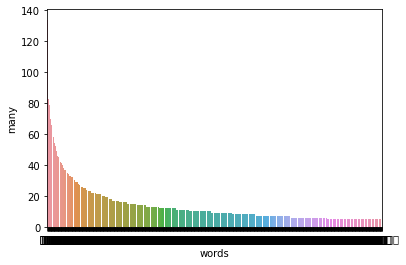

In [311]:
import seaborn as sns
sns.barplot(x='words', y='many', data=ndf2, orient='v')  # 바플롯

(-0.5, 1999.5, 1499.5, -0.5)

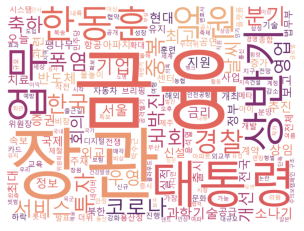

In [312]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 정제하면서 중간에 okreid의 형식이 딕셔너리 > 리스트로 바뀜.
# 그래서 따로 정제한 수량에 맞춰 딕셔너리 데이터를 다시 가져옴
okreid = dict(Counter(okre).most_common(1100))
                                             

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare', width=2000, height=1500).generate_from_frequencies(okreid)
# generate_from_frequencies : 미리 정의된 단어의 빈도수 를 이용하여 워드 클라우드를 그림
plt.imshow(wordcloud)
plt.axis('off')

In [313]:
html="""
<head>
    <title>crawler</title>
</head>
<body>
    <p class="a" align="center"> text1</p>
    <p class="b" align="center"> text2</p>
    <p class="c" align="center"> text3</p>
    <div>
        <img src="/source" width="300" height="200">
    </div>
</body>
</html>
"""

In [314]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(html, 'html.parser')
contents = bs.find('body')
contents

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

In [315]:
contents.children # 자식

for child in contents.children :
    print(child)



<p align="center" class="a"> text1</p>


<p align="center" class="b"> text2</p>


<p align="center" class="c"> text3</p>


<div>
<img height="200" src="/source" width="300"/>
</div>




In [316]:
# body의 자손은 p, div, img

for d in contents.descendants :   # 자손이 별도로 또 나옴
    print(d)



<p align="center" class="a"> text1</p>
 text1


<p align="center" class="b"> text2</p>
 text2


<p align="center" class="c"> text3</p>
 text3


<div>
<img height="200" src="/source" width="300"/>
</div>


<img height="200" src="/source" width="300"/>






In [317]:
img_tag = contents.find('img')
print(img_tag)

<img height="200" src="/source" width="300"/>


In [318]:
list(img_tag.parents) # 경우의 수가 다 나옴

[<div>
 <img height="200" src="/source" width="300"/>
 </div>,
 <body>
 <p align="center" class="a"> text1</p>
 <p align="center" class="b"> text2</p>
 <p align="center" class="c"> text3</p>
 <div>
 <img height="200" src="/source" width="300"/>
 </div>
 </body>,
 
 <head>
 <title>crawler</title>
 </head>
 <body>
 <p align="center" class="a"> text1</p>
 <p align="center" class="b"> text2</p>
 <p align="center" class="c"> text3</p>
 <div>
 <img height="200" src="/source" width="300"/>
 </div>
 </body>
 ]

- 태그 객체

In [319]:
# contents = bs.find('body')
contents.div.img

<img height="200" src="/source" width="300"/>

In [320]:
contents

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

In [321]:
p_tag = bs.find('p', class_='c')
p_tag

<p align="center" class="c"> text3</p>

- find_previous_sibling() : 바로 이전 형제 노드를 검색. (<-> find_next_sibling() :)
- find_previous_siblings() : 이전의 모든 형제 노드들을 검색

In [322]:
print(p_tag.find_previous_sibling()) # 바로 이전에 b클래스 노드가 있음

<p align="center" class="b"> text2</p>


In [323]:
print(p_tag.find_previous_siblings()) # 이전에 있는 모든 노드들 a,b클래스 출력

[<p align="center" class="b"> text2</p>, <p align="center" class="a"> text1</p>]


In [324]:
import urllib
from bs4 import BeautifulSoup

response = urllib.request.urlopen('https://naver.com')
byte_data = response.read()
html = byte_data.decode('utf-8')
bs = BeautifulSoup(html, 'html.parser')
nlists = bs.find_all('a',{'class':{'link_newsstand', 'btn_sort', 'btn_sort.sord_on'}})
for n in nlists :
    print(n.get_text())

뉴스스탠드
구독한 언론사
전체언론사


In [325]:
hlists = bs.findAll({'h1','h2','h3'}, limit = 5)
for h in hlists :
    print(h.get_text(), '\n')


네이버
 

뉴스스탠드 

주제별 캐스트 

Sign in 

타임스퀘어 



- 과제 07/27 (1)

코스피 지수, 등락폭 및 등락율을 출력하세요.

In [8]:
import requests
from bs4 import BeautifulSoup

# 네이버 금융 국내증시 메인 사이트 주소
# url = "https://finance.naver.com/sise/"
url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
cospi = soup.find('em', id='now_value')
change = soup.find('span', id='change_value_and_rate')
print(f'코스피 지수 : {cospi.get_text()}')
print(f'등락폭 : {change.get_text()[:5]}')
print(f'등락율 : {change.get_text()[6:-2]}')

코스피 지수 : 2,432.75
등락폭 : 17.22
등락율 : +0.71%


In [ ]:
from bs4 import BeautifulSoup

fp = open('./dataset/books.html', encoding='utf-8')
bs = BeautifulSoup(fp, 'html.parser')
print(bs,'\n')

sel = lambda q: print(bs.select_one(q).string)
sel('#nu') # id(#)가 nu인것. string만 뽑아줌

In [ ]:
# 9개의 Numbers를 출력하세요
sel('#nu')
sel('li#nu')
sel('#bible > #nu')
sel('#bible #nu')
sel('ul li#nu')
sel('ul > li#nu')
sel('ul #nu')
sel('ul > #nu')
sel('li:nth-child(4) ')
sel('ul li:nth-child(4) ')

- 과제 07/27 (2)

네이버 뉴스 검색 사이트에서 검색 키워드와 총 필요한 뉴스기사 수를 입력하면 요청한 만큼 데이터프레임 형태(컬럼은 title, url)로 출력해주는 크롤링 프로그램을 수행하세요.

In [3]:
from bs4 import BeautifulSoup
import requests
import urllib
import urllib.request as req
# 기본주소 : 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='

# cats = [264,265,267,268]

ind = 0 # 행 번호

word = urllib.parse.quote(input())  # 검색어를 입력하면 quote문으로 자동으로 바꿔줌
for i in range(15):
    # word : quote문으로 변환, str(i*10+1) : 페이지수에 따른 숫자 변환
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+str(word)+'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=148&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='+str(i*10+1)
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
    news = requests.get(url, headers=headers)
    bs = BeautifulSoup(news.text, 'html.parser')
    links = bs.find('body')
    newslinks = []
    for j, a in enumerate(links):
        newslink = a.get('href') # 기사들이 하나같이 a href~ 
        newslinks.append(newslink)
        newslinks = list(set(newslinks)) #중복기사 제거

    for link in newslinks:
        res2 = requests.get(link, headers=headers).text
        bs2 = BeautifulSoup(res2, 'html.parser')
        news = bs2.find('div', id = 'dic_area').text
        news = re.sub('\n','',news) # 개행을 공백으로
        news = re.sub('\t','',news) # tab을 공백으로
        news_df1.loc[ind] = [title,url]
        ind +=1
            
news_df1

    
# <input type="text" id="nx_query" name="query" class="box_window" maxlength="255" accesskey="s" 
# value="" autocomplete="off" placeholder="검색어를 입력해 주세요." data-atcmp-element="">
# selector  #nx_query

경찰


AttributeError: 'NavigableString' object has no attribute 'get'

In [4]:
# 데이터프레임
import pandas as pd
df = pd.DataFrame(columns=['title','url'])
df

,title,url


In [ ]:
import urllib
word = print(urllib.parse.quote(input()))
word

# print(urllib.parse.unquote('%EB%8F%84%EB%A0%88%EB%AF%B8'))

In [ ]:
aaa = int(input())/10
aaa

In [ ]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+str(word)+
'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=148&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='
+str(i*10+1)

쿼리 직후 오는 문자는 입력한 검색어가 쿼리문으로 출력
따라서 word = urllib.parse.quote(input())  # 검색어를 입력하면 quote문으로 자동으로 바꿔줌

페이지수 = &start=1, 11, 21, 31 ...(1,2,3,4페이지)
한 페이지에 기사 10개
따라서 마지막 주소는 +str(i*10+1)